In [90]:
pip install pycaret

Note: you may need to restart the kernel to use updated packages.


In [91]:
#Make necessary imports
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
from pycaret.datasets import get_data

dataset = pd.read_csv("Triage_Pre_Processed.csv")
dataset.head()

,Unnamed: 0,age,gender,rr,sat,pulse,bps,bpd,gcs,tempt,class
0,0,77.0,1,10.0,95.0,94.0,84.0,50.0,15.0,98.0,0
1,1,65.0,1,22.0,78.0,128.0,164.0,51.0,15.0,102.0,1
2,2,63.0,0,20.0,86.0,110.0,171.0,70.0,15.0,98.0,2
3,3,65.0,1,16.0,97.0,94.0,110.0,70.0,15.0,98.0,2
4,4,50.0,0,24.0,44.0,109.0,174.0,99.0,15.0,98.0,1


In [93]:
dataset = dataset.drop('Unnamed: 0', axis=1)
dataset

,age,gender,rr,sat,pulse,bps,bpd,gcs,tempt,class
0,77.0,1,10.0,95.0,94.0,84.0,50.0,15.0,98.0,0
1,65.0,1,22.0,78.0,128.0,164.0,51.0,15.0,102.0,1
2,63.0,0,20.0,86.0,110.0,171.0,70.0,15.0,98.0,2
3,65.0,1,16.0,97.0,94.0,110.0,70.0,15.0,98.0,2
4,50.0,0,24.0,44.0,109.0,174.0,99.0,15.0,98.0,1
...,...,...,...,...,...,...,...,...,...,...
747,24.0,2,30.0,97.0,122.0,150.0,100.0,15.0,98.0,0
748,34.0,0,18.0,98.0,88.0,110.0,70.0,15.0,98.0,0
749,8.0,1,20.0,97.0,88.0,110.0,80.0,15.0,98.0,0
750,25.0,1,20.0,98.0,88.0,124.0,84.0,15.0,98.0,0


In [94]:
dataset.shape

(752, 10)

In [95]:
dataset.isnull().sum()

age       0
gender    0
rr        0
sat       0
pulse     0
bps       0
bpd       0
gcs       0
tempt     0
class     0
dtype: int64

In [96]:
# creating the training data
data = dataset.sample(frac=0.95, random_state=786).reset_index(drop=True)
# creating the test data
data_unseen = dataset.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (714, 10)
Unseen Data For Predictions: (38, 10)


In [97]:
# Setting up Environment in PyCaret
from pycaret.classification import *

In [98]:
exp_clf101 = setup(data=data, target='class', session_id=123)

,Description,Value
0,Session id,123
1,Target,class
2,Target type,Multiclass
3,Original data shape,"(714, 10)"
4,Transformed data shape,"(714, 10)"
5,Transformed train set shape,"(499, 10)"
6,Transformed test set shape,"(215, 10)"
7,Numeric features,9
8,Preprocess,True
9,Imputation type,simple


In [99]:
# Comparing Model

compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.7374,0.0000,0.7374,0.6913,0.6940,0.2967,0.3305,0.2830
lda,Linear Discriminant Analysis,0.7355,0.7860,0.7355,0.7035,0.7087,0.3411,0.3592,0.3650
lr,Logistic Regression,0.7335,0.7831,0.7335,0.6965,0.7006,0.3151,0.3373,2.3470
gbc,Gradient Boosting Classifier,0.7214,0.7261,0.7214,0.6846,0.6920,0.2983,0.3183,0.8300
rf,Random Forest Classifier,0.7153,0.7482,0.7153,0.6622,0.6819,0.2753,0.2899,0.5930
et,Extra Trees Classifier,0.7133,0.7425,0.7133,0.6716,0.6793,0.2709,0.2930,0.6500
knn,K Neighbors Classifier,0.7033,0.6966,0.7033,0.6506,0.6672,0.2331,0.2492,0.3290
lightgbm,Light Gradient Boosting Machine,0.6993,0.7369,0.6993,0.6597,0.6736,0.2619,0.2735,0.9930
dummy,Dummy Classifier,0.6954,0.5000,0.6954,0.4836,0.5705,0.0000,0.0000,0.4300
ada,Ada Boost Classifier,0.6913,0.6282,0.6913,0.6570,0.6643,0.2407,0.2529,0.4190


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, positive=False, random_state=123, solver='auto',
                tol=0.0001)

In [100]:
# Create a Model

lda = create_model('lda') # from the table above, we can see that LogisticRegression works the best

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7200,0.7867,0.7200,0.6694,0.6928,0.3021,0.3088
1,0.6800,0.8329,0.6800,0.6345,0.6548,0.2095,0.2136
2,0.7400,0.8054,0.7400,0.7089,0.6850,0.2563,0.3125
3,0.7400,0.8037,0.7400,0.7010,0.7195,0.3937,0.3968
4,0.7000,0.6976,0.7000,0.6970,0.6953,0.3088,0.3110
5,0.7600,0.7692,0.7600,0.7184,0.7363,0.4071,0.4151
6,0.8000,0.8751,0.8000,0.7467,0.7622,0.4647,0.4998
7,0.7000,0.7825,0.7000,0.6745,0.6823,0.3068,0.3128
8,0.7800,0.7916,0.7800,0.7810,0.7514,0.4433,0.4862


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [101]:
# Tune a Model

tuned_lda = tune_model(lda)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7200,0.8026,0.7200,0.6626,0.6853,0.2685,0.2824
1,0.6800,0.8283,0.6800,0.6345,0.6548,0.2095,0.2136
2,0.7400,0.8099,0.7400,0.7089,0.6850,0.2563,0.3125
3,0.7600,0.8153,0.7600,0.7205,0.7392,0.4403,0.4438
4,0.7000,0.7089,0.7000,0.7018,0.6914,0.2997,0.3058
5,0.7600,0.7854,0.7600,0.7204,0.7389,0.4203,0.4249
6,0.8000,0.8812,0.8000,0.7467,0.7622,0.4647,0.4998
7,0.6600,0.7778,0.6600,0.6391,0.6470,0.2223,0.2244
8,0.7400,0.7973,0.7400,0.7461,0.7082,0.3487,0.3846


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


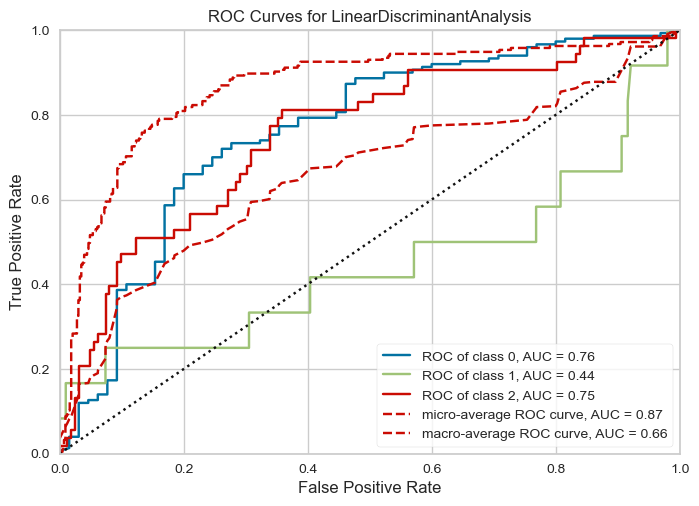

In [102]:
# Plotting Metrix
# ROC
plot_model(lda, plot = 'auc')

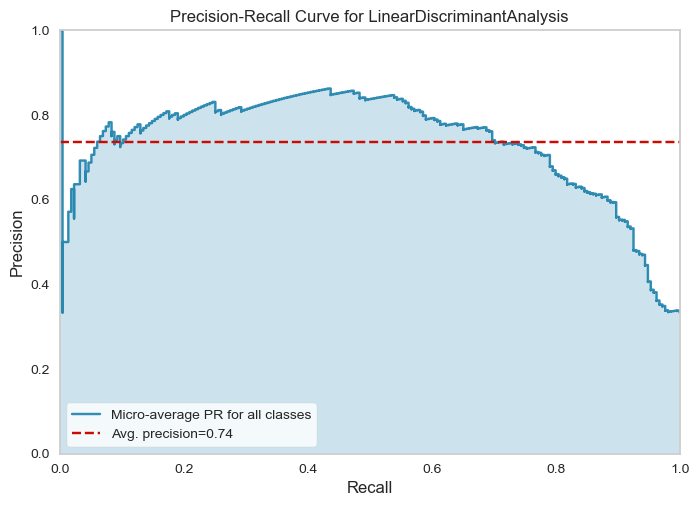

In [105]:
# Precision Recall curve
plot_model(lda, plot = 'pr')

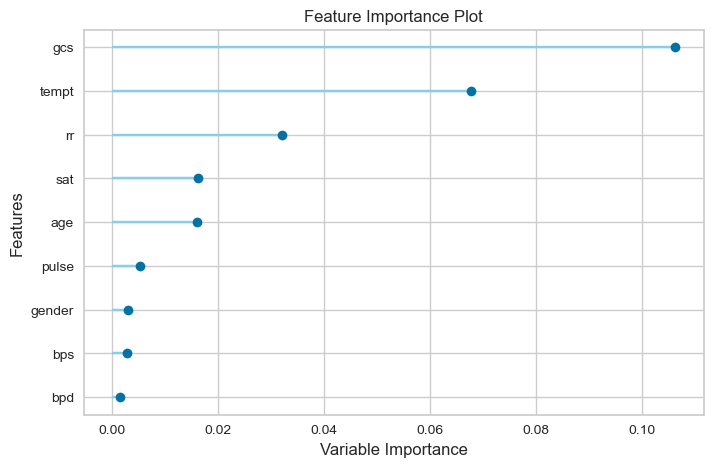

In [106]:
# Feature Importance Plot
plot_model(lda, plot='feature')

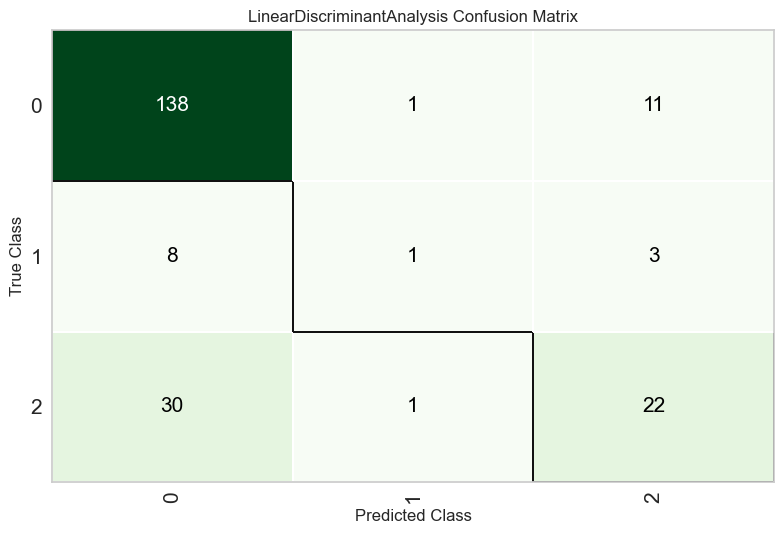

In [107]:
# Confusion Metrix

plot_model(lda, plot = 'confusion_matrix')

In [108]:
# Evaluate model

evaluate_model(lda)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [109]:
predict_model(lda)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.7488,0.7421,0.7488,0.7163,0.7200,0.3507,0.3685


,age,gender,rr,sat,pulse,bps,bpd,gcs,tempt,class,prediction_label,prediction_score
462,32.0,1,20.0,95.0,106.0,139.0,112.0,15.0,98.000000,0,0,0.8411
606,2.0,1,30.0,99.0,120.0,110.0,80.0,15.0,98.000000,0,0,0.9029
383,39.0,0,18.0,99.0,65.0,100.0,40.0,15.0,98.000000,2,0,0.8956
46,27.0,0,30.0,95.0,130.0,116.0,85.0,15.0,98.000000,0,0,0.6351
712,64.0,1,22.0,59.0,78.0,180.0,90.0,15.0,98.000000,2,2,0.6807
...,...,...,...,...,...,...,...,...,...,...,...,...
387,41.0,1,20.0,97.0,100.0,139.0,95.0,15.0,98.000000,0,0,0.7886
114,24.0,1,22.0,94.0,106.0,100.0,55.0,15.0,98.699997,0,0,0.8747
538,31.0,0,22.0,94.0,104.0,100.0,80.0,15.0,98.000000,2,0,0.8302
629,75.0,0,28.0,76.0,110.0,176.0,108.0,15.0,98.000000,2,2,0.6866


In [110]:
# Predict on test data

unseen_predictions = predict_model(lda, data=data_unseen)
unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.7632,0.7328,0.7632,0.7604,0.7388,0.3631,0.3877


,age,gender,rr,sat,pulse,bps,bpd,gcs,tempt,class,prediction_label,prediction_score
0,40.0,1,24.0,96.0,116.0,60.0,40.0,14.0,98.0,0,0,0.6589
1,75.0,1,20.0,97.0,103.0,100.0,50.0,15.0,98.0,2,2,0.6809
2,73.0,1,20.0,94.0,96.0,160.0,80.0,15.0,98.0,2,2,0.6334
3,26.0,1,20.0,97.0,72.0,130.0,80.0,15.0,98.0,0,0,0.9315
4,83.0,1,24.0,59.0,86.0,115.0,54.0,15.0,98.0,0,2,0.9411


In [111]:
# Save model
save_model(lda,'linear_discriminant_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\joysi\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['age', 'gender', 'rr', 'sat',
                                              'pulse', 'bps', 'bpd', 'gcs',
                                              'tempt'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbose='...
                  TransformerWrapper(exclude=None, incl

In [118]:
pip install streamlit

In [130]:
%%writefile app.py
 
import streamlit as st
import pandas as pd
from pycaret.classification import load_model, predict_model

# Load the saved PyCaret model
model = load_model('linear_discriminant_model')

# Define the Streamlit app
def main():
    # Front-end elements of the web page
    html_temp = """ 
    <div style ="background-color:cyan;padding:13px"> 
    <h1 style ="color:black;text-align:center;">Triage Severity Prediction</h1> 
    </div> 
    """
      
    # Display the front-end aspect
    st.markdown(html_temp, unsafe_allow_html=True) 
      
    # Following lines create input fields for user data
    gender = st.selectbox('Gender', ("Female", "Male", "Transgender")) 
    age = st.number_input("Age")
    rr = st.number_input("Respiratory Rate")
    sat = st.number_input("Oxygen Saturation")
    pulse = st.number_input("Pulse Rate")
    bps = st.number_input("Systolic Blood Pressure")
    bpd = st.number_input("Diastolic Blood Pressure")
    gcs = st.number_input("Glasgow Coma Scale")
    tempt = st.number_input("Temperature")

    result = ""
      
    # When 'Predict' is clicked, make the prediction and display it
    if st.button("Predict"): 
        # Pre-processing user input
        if gender == "Female":
            gender = 0
        elif gender == 'Male':
            gender = 1
        else:
            gender = 2

        # Create a data frame with the user input
        user_data = pd.DataFrame({
            'age': [age],
            'gender': [gender],
            'rr': [rr],
            'sat': [sat],
            'pulse': [pulse],
            'bps': [bps],
            'bpd': [bpd],
            'gcs': [gcs],
            'tempt': [tempt]
        }, index=None)

        # Use the PyCaret model to generate predictions based on the user's input values
        pred = predict_model(model, data=user_data)
        
        # Create an empty DataFrame with the desired column names
        result_df = pd.DataFrame(columns=['prediction_label'])

        # Append the predicted label to the DataFrame
        result_df.loc[0] = pred['prediction_label'].iloc[0]

        # Assign the appropriate result based on the label value
        if result_df['prediction_label'][0] == 0:
               result = 'Do not require urgent attention'
        elif result_df['prediction_label'][0] == 1:
               result = 'Immediate care needed'
        else:
              result = 'Urgent need required but with high chance of recovery'
        st.success('Report Results: {}'.format(result))

if __name__ == '__main__':
    main()

Writing app.py
